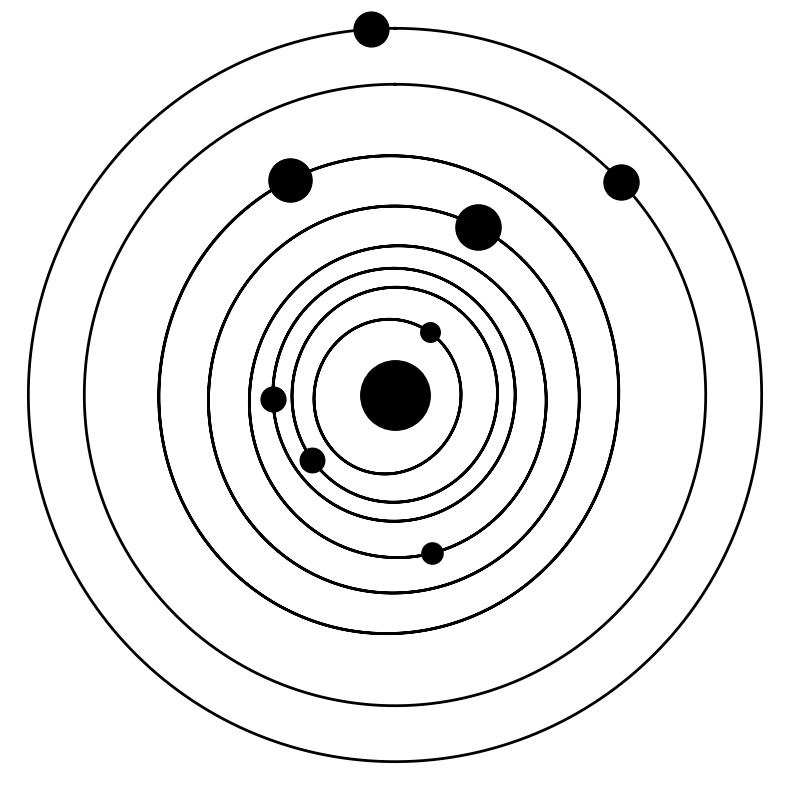

In [9]:
!pip install skyfield matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skyfield.api import load

planets = load('de421.bsp')

# Define the date
ts = load.timescale()
t = ts.utc(2023, 6, 20)

# Define the planets to plot
bodies = ['mercury', 'venus', 'earth', 'mars', 'jupiter barycenter', 'saturn barycenter', 'uranus barycenter',
          'neptune barycenter']

planetary_symbols = {
    'mercury': '☿',
    'venus': '♀',
    'earth': '♁',
    'mars': '♂',
    'jupiter barycenter': '♃',
    'saturn barycenter': '♄',
    'uranus barycenter': '♅',
    'neptune barycenter': '♆'
}

# Orbital periods in Earth years
orbital_periods = {
    'mercury': 88 / 365.25,  # Earth days to years
    'venus': 225 / 365.25,
    'earth': 1,
    'mars': 687 / 365.25,
    'jupiter barycenter': 11.86,
    'saturn barycenter': 29.46,
    'uranus barycenter': 84.01,
    'neptune barycenter': 164.79
}

# Planet radii in km
planet_radii = {
    'mercury': 2439.7,
    'venus': 6051.8,
    'earth': 6371.0,
    'mars': 3389.5,
    'jupiter barycenter': 69911,  # Using Jupiter's radius
    'saturn barycenter': 58232,  # Using Saturn's radius
    'uranus barycenter': 25362,  # Using Uranus's radius
    'neptune barycenter': 24622,  # Using Neptune's radius
}

sun = planets['sun']

# Create the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')
ax.grid(False)

# Remove distance markers
ax.set_rticks([])  # This line removes the radial ticks/markers
ax.spines['polar'].set_visible(False)  # Remove the outer line
ax.set_theta_zero_location('N')  # Set 0 degrees to North
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_xticklabels([])  # Remove the angular tick labels

# Number of points to plot for each orbit
num_points = 10000
sun_size = 2500
sun_font_size = 100
planet_size_factor = 4
planet_font_size = 1.8
orbit_factor = 1.5
distance_power = 0.25

orbit_count = 0
for body_name in bodies:
    body = planets[body_name]
    orbit_count = orbit_count + 1

    # getting the outer planet closer to the sun to reduce the overall size
    if body_name in ['jupiter barycenter', 'saturn barycenter', 'uranus barycenter', 'neptune barycenter']:
        orbit_adjustment = orbit_factor / np.sqrt(orbit_count)
    else:
        orbit_adjustment = 1

    # neptun and uranus orbit need to be plotted as circle, skyfield don't support the timeframe of a total orbit
    if body_name in ['neptune barycenter', 'uranus barycenter']:

        theta = np.linspace(0, 2 * np.pi, num_points)
        astrometric = sun.at(t).observe(body)
        position = astrometric.position.au
        distance = np.power(position[0] ** 2 + position[1] ** 2, distance_power) * orbit_adjustment
        r = np.ones_like(theta) * distance  # All points have the same radius

        # Plot the circle
        ax.plot(theta, r, color='black', linewidth=2)

    else:
        period_years = orbital_periods.get(body_name)

        orbit_times = ts.linspace(t - 365 * period_years, t + 365 * period_years, num_points)

        astrometrics = sun.at(orbit_times).observe(body)
        positions = astrometrics.position.au

        # Extract distances and angles for the orbit
        distances = np.power(positions[0, :] ** 2 + positions[1, :] ** 2, distance_power) * orbit_adjustment
        angles = np.arctan2(positions[1, :], positions[0, :])

        # Plot the orbit line
        ax.plot(angles, distances, label=body_name, linewidth=2, color='black')

    # Plot the planet's current position
    astrometric = sun.at(t).observe(body)
    position = astrometric.position.au
    distance = np.power(position[0] ** 2 + position[1] ** 2, distance_power) * orbit_adjustment
    angle = np.arctan2(position[1], position[0])
    adjusted_planet_size = np.sqrt(planet_radii.get(body_name)) * planet_size_factor
    adjusted_planet_font_size = np.power(planet_radii.get(body_name), distance_power) * planet_font_size
    ax.scatter(angle, distance, label=body_name, s=adjusted_planet_size, color='black')

    #optional add planet symbols
    #ax.text(angle, distance, planetary_symbols.get(body_name), fontsize=adjusted_planet_font_size, color='white', ha='center', va='center', fontweight='bold', fontfamily='monospace')

# sun
ax.scatter(0, 0, label='sun', s=sun_size, color='black')
#optional add sun symbol
#ax.text(0, 0, '☉', fontsize=sun_font_size, color='white', ha='center', va='center', fontweight='bold', fontfamily='monospace')

# Show the plot
plt.show()